# Project-2 (World Happiness Report) 

In [1]:
#Let's import necessary Libraries

#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visulaziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print("Successfully imported Libraries")

Successfully imported Libraries


In [2]:
#Let's load the data set
happiness=pd.read_csv('happiness_score_dataset.csv')

In [3]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Exploratory Data Analysis

In [4]:
#Let's check the shape of our data set
happiness.shape

(158, 12)

In [5]:
#Let's check for the missing values
happiness.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

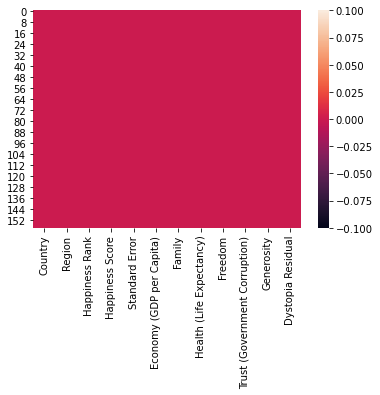

In [6]:
#Let's ceck the heat map for better visual
sns.heatmap(happiness.isnull())
plt.show()

In [7]:
#Let's begin with our EDA
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### We can observe that there are none missing values

In [8]:
# iterate over each attribute and print values count for it
for key, value in happiness.iteritems():
    print(happiness[key].value_counts(), "\n")

Ghana          1
Uruguay        1
Burundi        1
Iceland        1
Cameroon       1
              ..
Bolivia        1
Afghanistan    1
Lithuania      1
Chad           1
Togo           1
Name: Country, Length: 158, dtype: int64 

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64 

82     2
158    1
50     1
57     1
56     1
      ..
106    1
105    1
104    1
103    1
1      1
Name: Happiness Rank, Length: 157, dtype: int64 

5.192    2
4.642    1
5.098    1
5.129    1
5.889    1
        ..
4.252    1
4.633    1
3.931    1
7.200    1
6.750    1
Name: Happiness Score, Length: 157, dtype: int64 

0.03751    2
0.04934    2
0.03780    2
0

In [9]:
#let's check the correlation in the data set
happiness.corr()
happiness.corr().style.background_gradient(cmap='coolwarm')


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


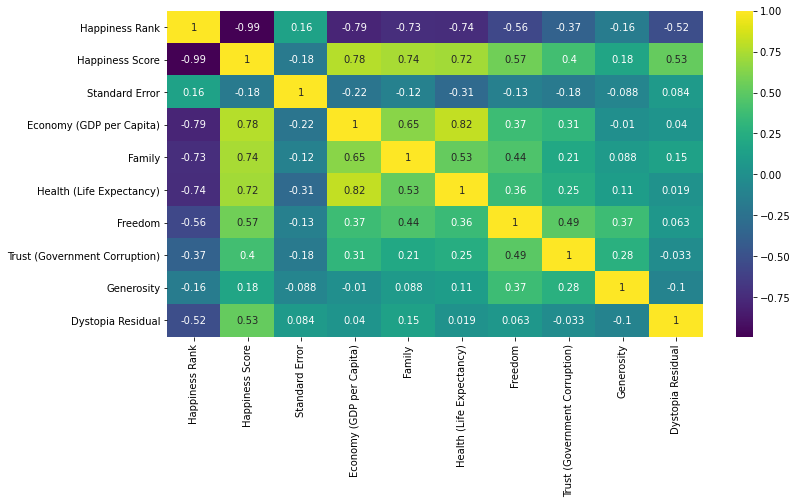

In [10]:
# Let's see the correlation 
plt.figure(figsize=(12,6))
sns.heatmap(happiness.corr(),annot=True,cmap='viridis');

# Happiness Score

Good correlation with:

 Economy 
 Health
 Family
 Freedom

Moderate correlation with:

 Dystopia Residual
 Trust in Government
 
Less correlation with:

 Generosity

So we can say that Economy, Health, Family and freedom plays am important
role in the happiness of the country where as Transparent government, Generosity will not hav any effect on the chappiness score of the country.


In [11]:
#Let's check the stats metrix 
happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
happiness_score=pd.DataFrame(happiness["Happiness Score"])
happiness_score.describe()

,Happiness Score
count,158.000000
mean,5.375734
std,1.145010
min,2.839000
25%,4.526000
50%,5.232500
75%,6.243750
max,7.587000


In [13]:
print('Regions Counts:\n')
print(happiness['Region'].value_counts())

Regions Counts:

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


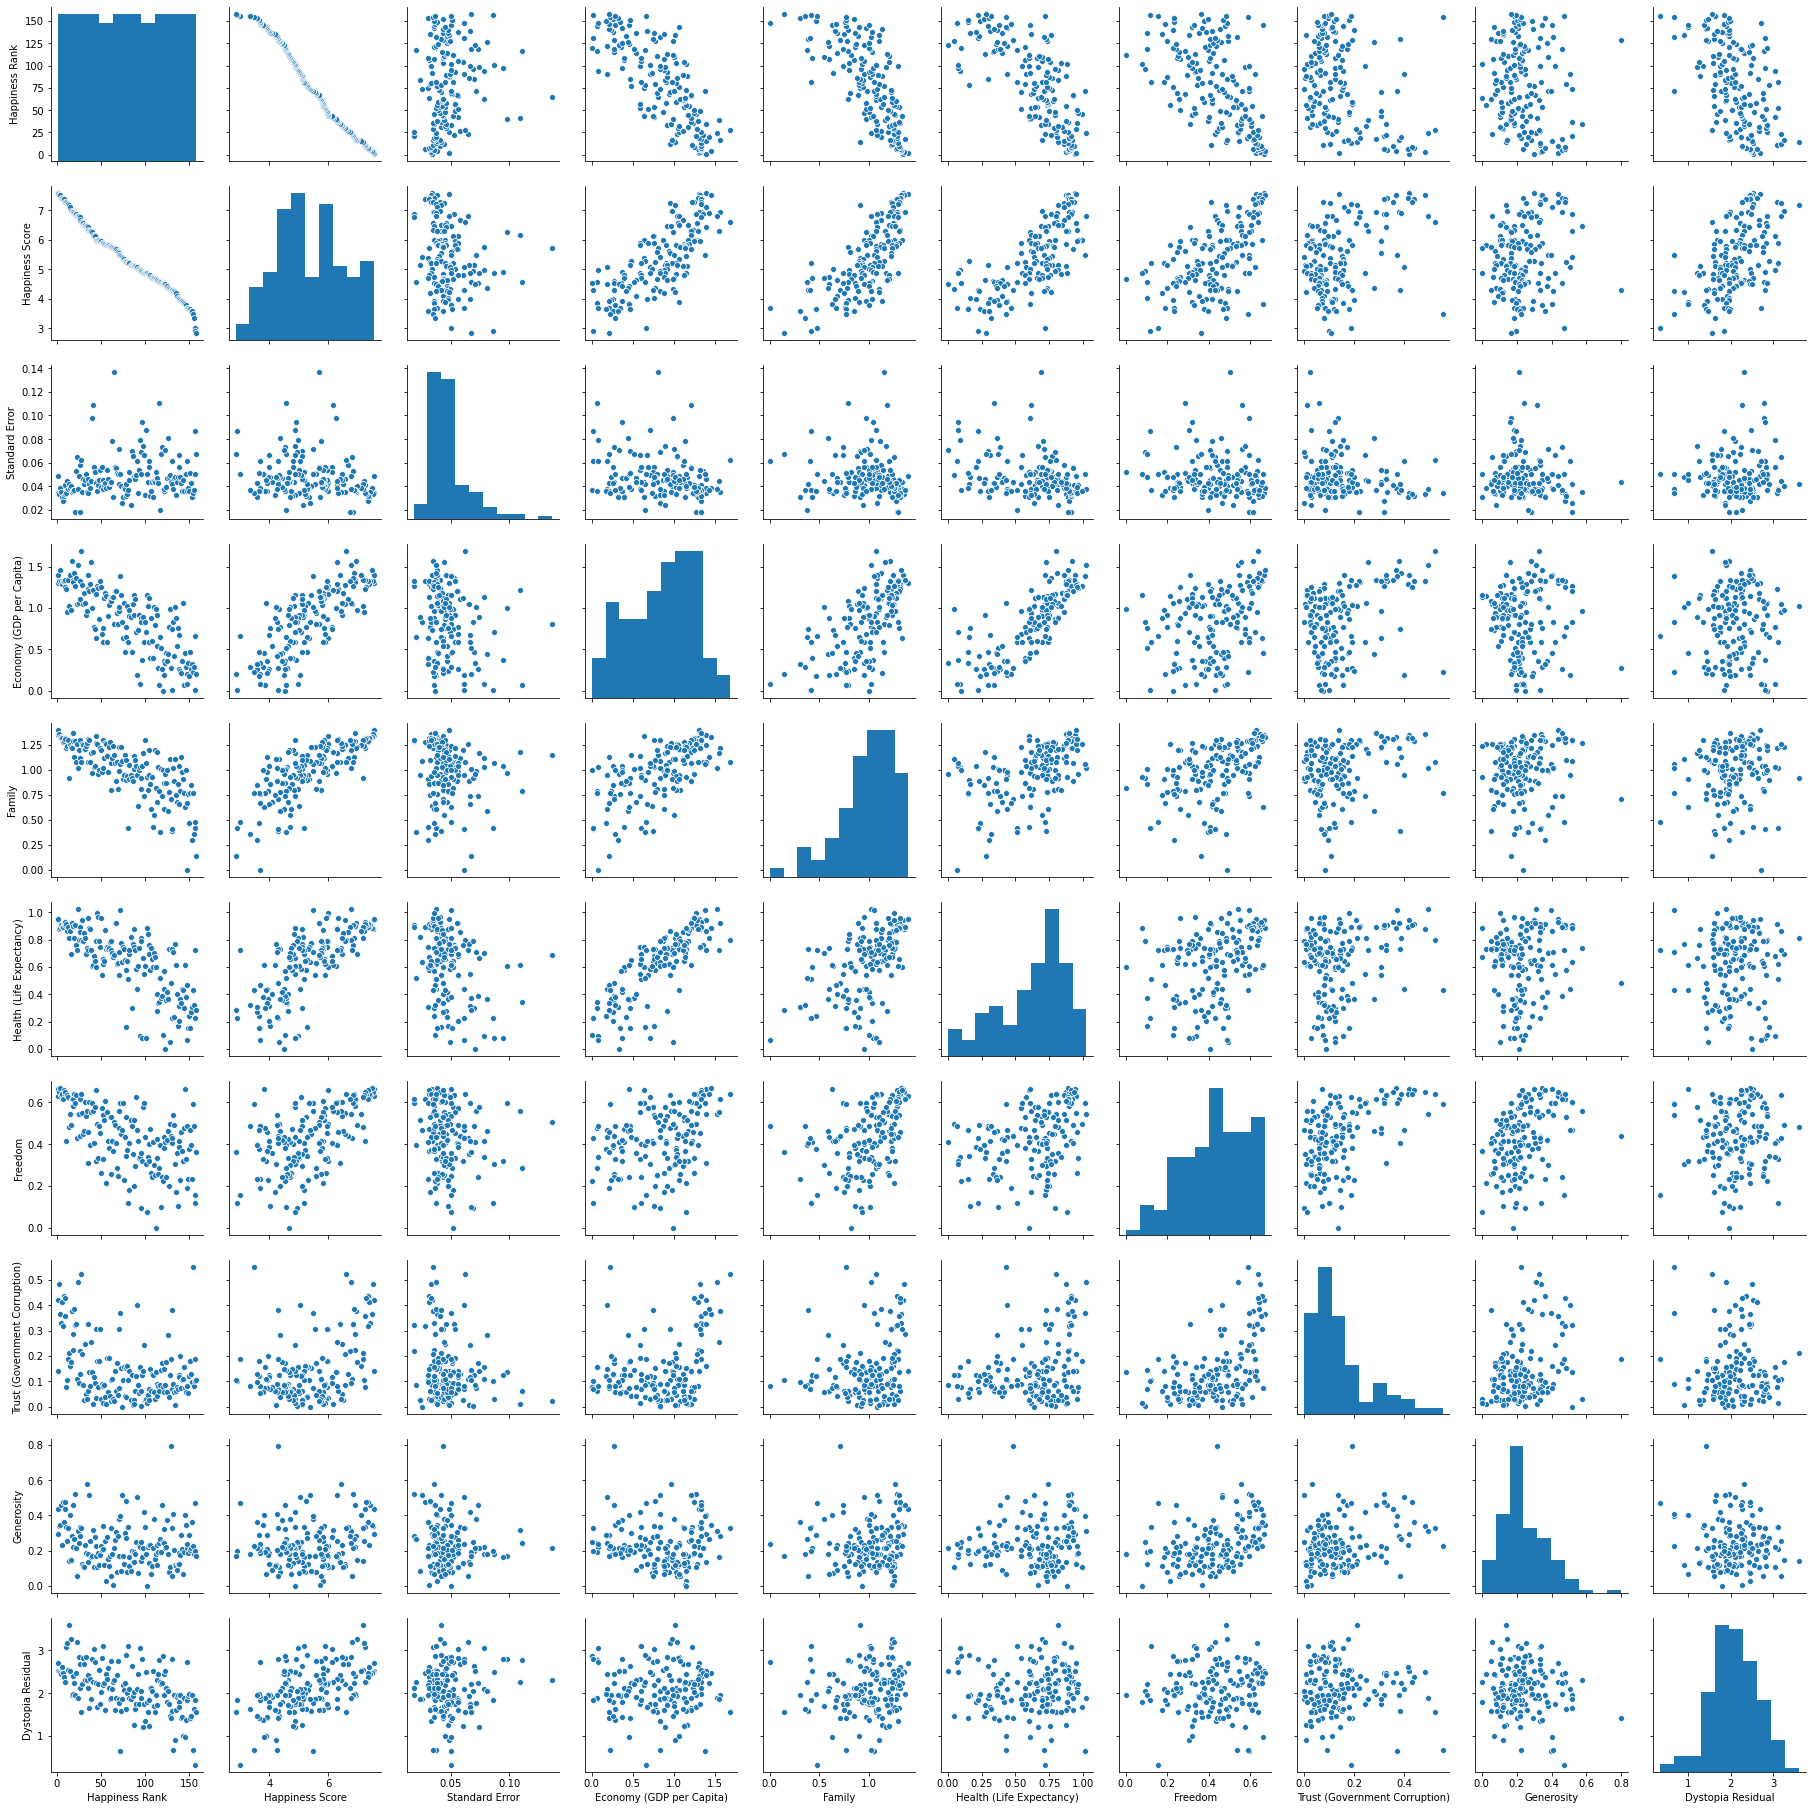

In [14]:
#Let's see the visual charaterstics of the data
sns.pairplot(happiness);

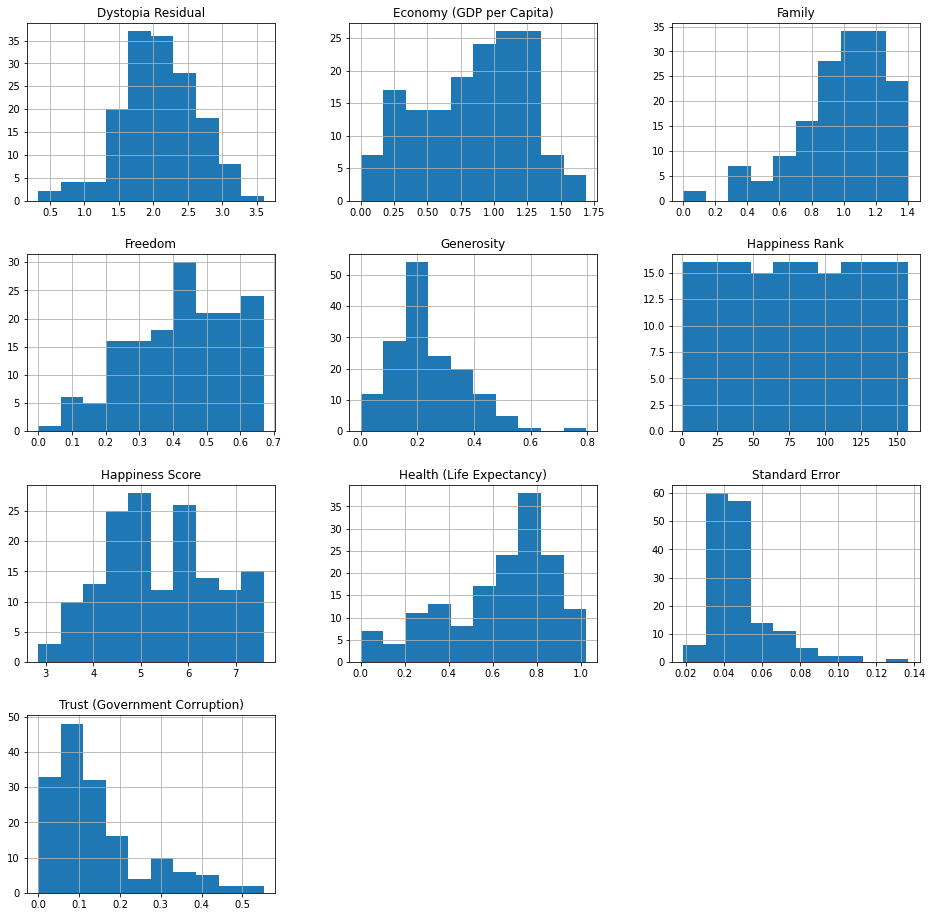

In [15]:
happiness.hist(figsize=(16,16));

In [16]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


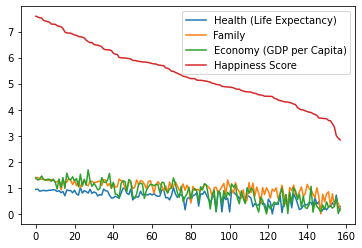

In [17]:
happiness_plot = happiness.loc[:,["Health (Life Expectancy)","Family", "Economy (GDP per Capita)","Happiness Score" ]]
happiness_plot.plot();

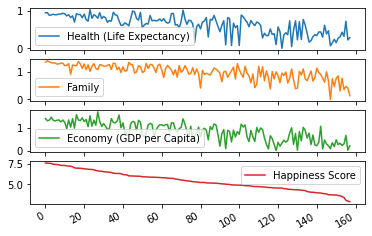

In [18]:
happiness_plot.plot(subplots=True);

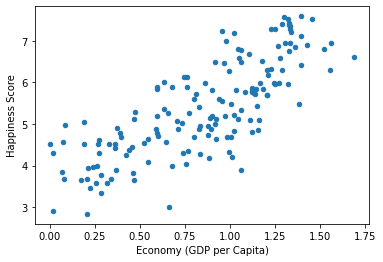

In [19]:
happiness_plot.plot(kind = "scatter", x = "Economy (GDP per Capita)", y = "Happiness Score");

#### We can see this positive relationship between happiness score and economy from scatterplot.

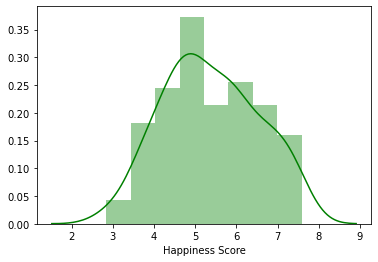

In [20]:
sns.distplot(happiness['Happiness Score'],color='g');

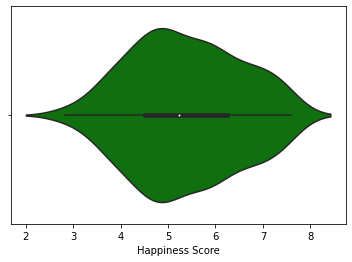

In [21]:
sns.violinplot(happiness['Happiness Score'],color='g');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

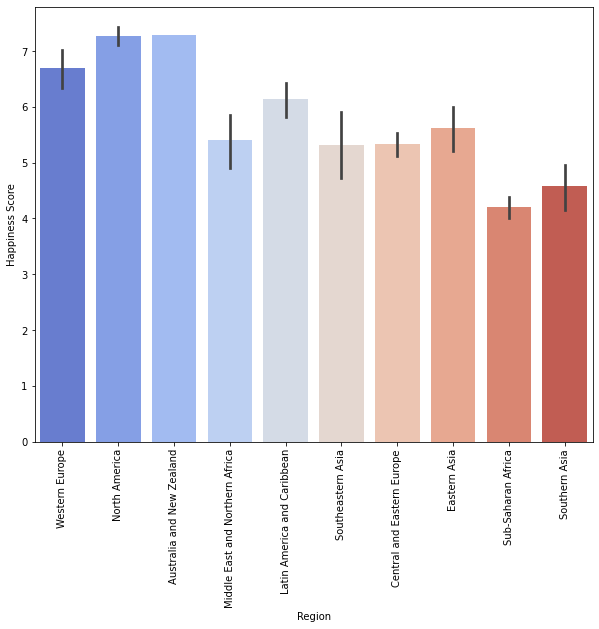

In [22]:
fig=plt.figure(figsize=(10,8))
sns.barplot(x='Region',y='Happiness Score',data=happiness, palette='coolwarm');
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=90)

#### From the above chart we can observe that North Americal, Europe, Australia are the most happiest country

<Figure size 432x432 with 0 Axes>

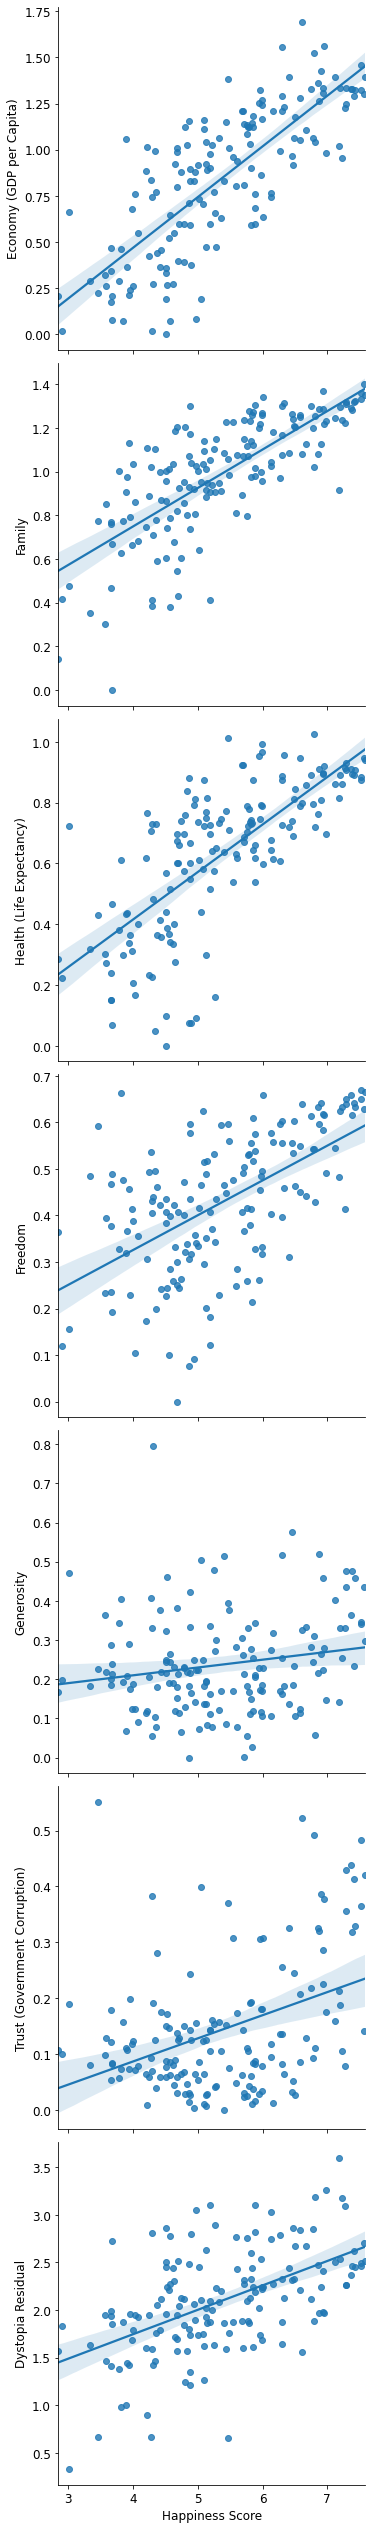

In [23]:
fig=plt.figure(figsize=(6,6));
sns.pairplot(data=happiness, kind='reg', size = 5,x_vars=['Happiness Score'],y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']);

#### From the above scatter chart we can cleary observe that they have positive relationship. And Economy, Family and health are the major factors that drives the happiness in the whole world

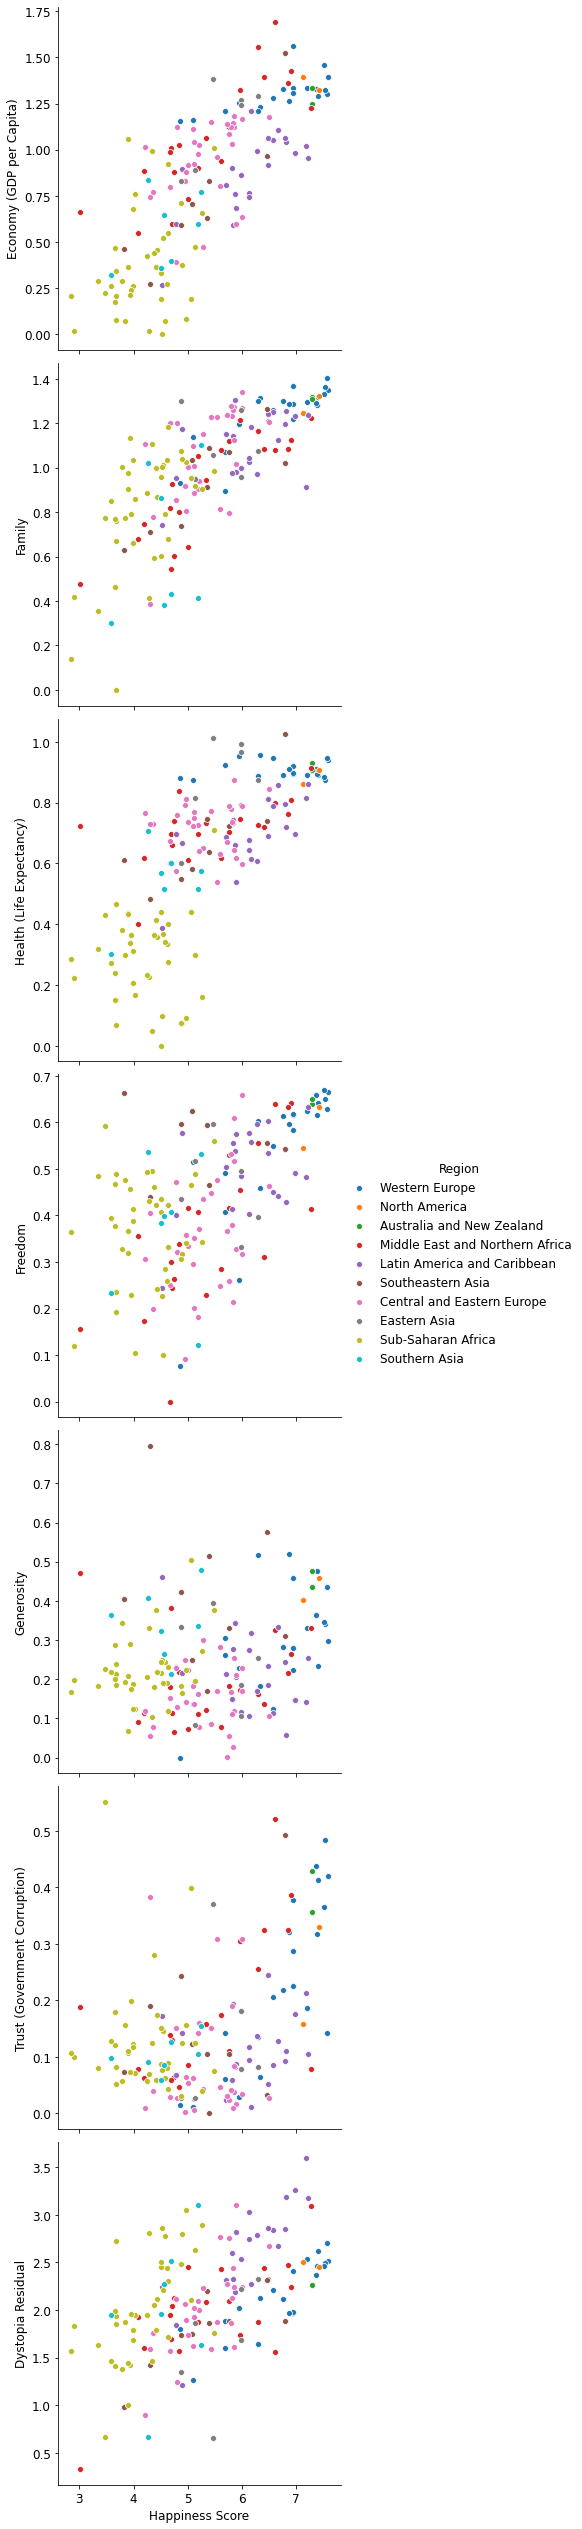

In [24]:
sns.pairplot(data=happiness, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']);

#### There is a positive relationship and the happiness will increase if the Economy, Health and Freedom incresaes

In [25]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(happiness.columns)):
    happiness[happiness.columns[column]]=le.fit_transform(happiness[happiness.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)


In [27]:
mappings

[{0: 'Afghanistan',
  1: 'Albania',
  2: 'Algeria',
  3: 'Angola',
  4: 'Argentina',
  5: 'Armenia',
  6: 'Australia',
  7: 'Austria',
  8: 'Azerbaijan',
  9: 'Bahrain',
  10: 'Bangladesh',
  11: 'Belarus',
  12: 'Belgium',
  13: 'Benin',
  14: 'Bhutan',
  15: 'Bolivia',
  16: 'Bosnia and Herzegovina',
  17: 'Botswana',
  18: 'Brazil',
  19: 'Bulgaria',
  20: 'Burkina Faso',
  21: 'Burundi',
  22: 'Cambodia',
  23: 'Cameroon',
  24: 'Canada',
  25: 'Central African Republic',
  26: 'Chad',
  27: 'Chile',
  28: 'China',
  29: 'Colombia',
  30: 'Comoros',
  31: 'Congo (Brazzaville)',
  32: 'Congo (Kinshasa)',
  33: 'Costa Rica',
  34: 'Croatia',
  35: 'Cyprus',
  36: 'Czech Republic',
  37: 'Denmark',
  38: 'Djibouti',
  39: 'Dominican Republic',
  40: 'Ecuador',
  41: 'Egypt',
  42: 'El Salvador',
  43: 'Estonia',
  44: 'Ethiopia',
  45: 'Finland',
  46: 'France',
  47: 'Gabon',
  48: 'Georgia',
  49: 'Germany',
  50: 'Ghana',
  51: 'Greece',
  52: 'Guatemala',
  53: 'Guinea',
  54: 'Ha

In [28]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,0,156,19,151,154,148,156,150,115,125
1,58,9,1,155,100,136,157,150,143,98,144,134
2,37,9,2,154,16,139,155,128,151,153,129,122
3,105,9,3,153,50,153,152,132,157,143,132,118
4,24,5,4,152,26,140,151,140,145,141,145,116


In [29]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Country                        158 non-null    int32
 1   Region                         158 non-null    int32
 2   Happiness Rank                 158 non-null    int64
 3   Happiness Score                158 non-null    int64
 4   Standard Error                 158 non-null    int64
 5   Economy (GDP per Capita)       158 non-null    int64
 6   Family                         158 non-null    int64
 7   Health (Life Expectancy)       158 non-null    int64
 8   Freedom                        158 non-null    int64
 9   Trust (Government Corruption)  158 non-null    int64
 10  Generosity                     158 non-null    int64
 11  Dystopia Residual              158 non-null    int64
dtypes: int32(2), int64(10)
memory usage: 13.7 KB


In [30]:
#Let's check for outliers
from scipy.stats import zscore
z_score=abs(zscore(happiness))
print(happiness.shape)
happiness_final=happiness.loc[(z_score<3).all(axis=1)]
print(happiness_final.shape)

(158, 12)
(158, 12)


In [31]:
happiness.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                  -0.001271
Happiness Score                  0.001271
Standard Error                   0.002827
Economy (GDP per Capita)         0.000000
Family                           0.000000
Health (Life Expectancy)        -0.007319
Freedom                          0.000000
Trust (Government Corruption)   -0.009927
Generosity                       0.000000
Dystopia Residual                0.000000
dtype: float64

In [32]:
# Let's treat the skewness
for col in happiness.columns:
    if happiness.skew().loc[col]>0.5:
        happiness[col]=np.log1p(happiness[col])

In [33]:
happiness.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                  -0.001271
Happiness Score                  0.001271
Standard Error                   0.002827
Economy (GDP per Capita)         0.000000
Family                           0.000000
Health (Life Expectancy)        -0.007319
Freedom                          0.000000
Trust (Government Corruption)   -0.009927
Generosity                       0.000000
Dystopia Residual                0.000000
dtype: float64

In [34]:
#Let's split the data into 'x' independent and 'y' dependent variables
x = happiness.drop(['Happiness Score'],axis=1)
y = happiness['Happiness Score']

In [35]:
#Let's split the data into 'x' independent and 'y' dependent variables
x = happiness.drop(['Happiness Score'],axis=1)
y = happiness['Happiness Score']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [36]:
#First let's scle our model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
#Using different models
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

classifiers = [
    SGDRegressor(max_iter=100000),
    LinearSVR(max_iter=100000),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
]

In [38]:
#Evaluating scores by cross-validation
from sklearn.model_selection import cross_val_score
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    scores = cross_val_score(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print("Mean: ", scores.mean())
    print("Std deviation: ", scores.std())
    
print("="*30)

SGDRegressor
Mean:  -0.9605239807783047
Std deviation:  0.4930353230338048
LinearSVR
Mean:  -81.13564846280136
Std deviation:  35.53218680350459
DecisionTreeRegressor
Mean:  -11.48181818181818
Std deviation:  4.3524572711883875
RandomForestRegressor
Mean:  -3.7288627272727277
Std deviation:  1.795091605017452


In [39]:
#We will use Grid Search to get best settings(estimator) for Random Forest Regression
from sklearn.model_selection import GridSearchCV
#param_grid is for our settings lets see what fits the best
param_grid = [
    {'n_estimators': [3, 10, 30,50,100,200,300]},
      ]
rnd_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rnd_reg, param_grid, cv=10,scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'n_estimators': [3, 10, 30, 50, 100, 200, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_search.best_params_

{'n_estimators': 300}

In [41]:
#Predictions on best Parameters
best_reg = grid_search.best_estimator_
y_pred = best_reg.predict(x_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mae=mean_absolute_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
print("Final MAE:",final_mae)
print("Final MSE:",final_mse)
print("Final RMSE:",final_rmse)

Final MAE: 1.001180555555556
Final MSE: 1.525428935185187
Final RMSE: 1.2350825620925863
